In [1]:
#import used libraries
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import pandas as pd
from scipy import stats
from sklearn import metrics
from sklearn.cross_validation import train_test_split
from sklearn.model_selection import GridSearchCV

# Set the maximum number of rows to 5
pd.set_option('display.max_rows', 50)
# Set the maximum decimal points to three.
pd.options.display.float_format = '{:30,.3f}'.format

C:\Users\klovs\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
### Load in all of the year tables
london_grid_2008 = pd.read_csv('london_grid_2008.csv')
london_grid_2009 = pd.read_csv('london_grid_2009.csv')
london_grid_2010 = pd.read_csv('london_grid_2010.csv')
london_grid_2011 = pd.read_csv('london_grid_2011.csv')
london_grid_2012 = pd.read_csv('london_grid_2012.csv')
london_grid_2013 = pd.read_csv('london_grid_2013.csv')
london_grid_2014 = pd.read_csv('london_grid_2014.csv')
london_grid_2015 = pd.read_csv('london_grid_2015.csv')
london_grid_2016 = pd.read_csv('london_grid_2016.csv')
london_grid_2017 = pd.read_csv('london_grid_2017.csv')
london_grid_2018 = pd.read_csv('london_grid_2018.csv')
london_grid_2019 = pd.read_csv('london_grid_2019.csv')

In [4]:
london_gridtrim_2008 = london_grid_2008.drop(['xmax', 'xmin', 'ymin', 'ymax', 'square_name', 'NEIGHBORS'], axis=1)
london_gridtrim_2009 = london_grid_2009.drop(['xmax', 'xmin', 'ymin', 'ymax', 'square_name', 'NEIGHBORS'], axis=1)
london_gridtrim_2010 = london_grid_2010.drop(['xmax', 'xmin', 'ymin', 'ymax', 'square_name', 'NEIGHBORS'], axis=1)
london_gridtrim_2011 = london_grid_2011.drop(['xmax', 'xmin', 'ymin', 'ymax', 'square_name', 'NEIGHBORS'], axis=1)
london_gridtrim_2012 = london_grid_2012.drop(['xmax', 'xmin', 'ymin', 'ymax', 'square_name', 'NEIGHBORS'], axis=1)
london_gridtrim_2013 = london_grid_2013.drop(['xmax', 'xmin', 'ymin', 'ymax', 'square_name', 'NEIGHBORS'], axis=1)
london_gridtrim_2014 = london_grid_2014.drop(['xmax', 'xmin', 'ymin', 'ymax', 'square_name', 'NEIGHBORS'], axis=1)
london_gridtrim_2015 = london_grid_2015.drop(['xmax', 'xmin', 'ymin', 'ymax', 'square_name', 'NEIGHBORS'], axis=1)
london_gridtrim_2016 = london_grid_2016.drop(['xmax', 'xmin', 'ymin', 'ymax', 'square_name', 'NEIGHBORS'], axis=1)
london_gridtrim_2017 = london_grid_2017.drop(['xmax', 'xmin', 'ymin', 'ymax', 'square_name', 'NEIGHBORS'], axis=1)
london_gridtrim_2018 = london_grid_2018.drop(['xmax', 'xmin', 'ymin', 'ymax', 'square_name', 'NEIGHBORS'], axis=1)
london_gridtrim_2019 = london_grid_2019.drop(['xmax', 'xmin', 'ymin', 'ymax', 'square_name', 'NEIGHBORS'], axis=1)

In [5]:
london_gridtrim_2008 = london_gridtrim_2008.rename(columns={'NUMPOINTS' : 'numpoints_2008'})
london_gridtrim_2008 = london_gridtrim_2008.rename(columns={'SUM' : 'sum_2008'})
london_gridtrim_2009 = london_gridtrim_2009.rename(columns={'NUMPOINTS' : 'numpoints_2009'})
london_gridtrim_2009 = london_gridtrim_2009.rename(columns={'SUM' : 'sum_2009'})
london_gridtrim_2010 = london_gridtrim_2010.rename(columns={'NUMPOINTS' : 'numpoints_2010'})
london_gridtrim_2010 = london_gridtrim_2010.rename(columns={'SUM' : 'sum_2010'})
london_gridtrim_2011 = london_gridtrim_2011.rename(columns={'NUMPOINTS' : 'numpoints_2011'})
london_gridtrim_2011 = london_gridtrim_2011.rename(columns={'SUM' : 'sum_2011'})
london_gridtrim_2012 = london_gridtrim_2012.rename(columns={'NUMPOINTS' : 'numpoints_2012'})
london_gridtrim_2012 = london_gridtrim_2012.rename(columns={'SUM' : 'sum_2012'})
london_gridtrim_2013 = london_gridtrim_2013.rename(columns={'NUMPOINTS' : 'numpoints_2013'})
london_gridtrim_2013 = london_gridtrim_2013.rename(columns={'SUM' : 'sum_2013'})
london_gridtrim_2014 = london_gridtrim_2014.rename(columns={'NUMPOINTS' : 'numpoints_2014'})
london_gridtrim_2014 = london_gridtrim_2014.rename(columns={'SUM' : 'sum_2014'})
london_gridtrim_2015 = london_gridtrim_2015.rename(columns={'NUMPOINTS' : 'numpoints_2015'})
london_gridtrim_2015 = london_gridtrim_2015.rename(columns={'SUM' : 'sum_2015'})
london_gridtrim_2016 = london_gridtrim_2016.rename(columns={'NUMPOINTS' : 'numpoints_2016'})
london_gridtrim_2016 = london_gridtrim_2016.rename(columns={'SUM' : 'sum_2016'})
london_gridtrim_2017 = london_gridtrim_2017.rename(columns={'NUMPOINTS' : 'numpoints_2017'})
london_gridtrim_2017 = london_gridtrim_2017.rename(columns={'SUM' : 'sum_2017'})
london_gridtrim_2018 = london_gridtrim_2018.rename(columns={'NUMPOINTS' : 'numpoints_2018'})
london_gridtrim_2018 = london_gridtrim_2018.rename(columns={'SUM' : 'sum_2018'})
london_gridtrim_2019 = london_gridtrim_2019.rename(columns={'NUMPOINTS' : 'numpoints_2019'})
london_gridtrim_2019 = london_gridtrim_2019.rename(columns={'SUM' : 'sum_2019'})
london_gridtrim_2009.dtypes

id                int64
numpoints_2009    int64
sum_2009          int64
dtype: object

In [6]:
# outer join in python pandas
london_grid = pd.merge(london_gridtrim_2008, london_gridtrim_2009, how='right', on='id')
london_grid = pd.merge(london_grid, london_gridtrim_2010, how='right', on='id')
london_grid = pd.merge(london_grid, london_gridtrim_2011, how='right', on='id')
london_grid = pd.merge(london_grid, london_gridtrim_2012, how='right', on='id')
london_grid = pd.merge(london_grid, london_gridtrim_2013, how='right', on='id')
london_grid = pd.merge(london_grid, london_gridtrim_2014, how='right', on='id')
london_grid = pd.merge(london_grid, london_gridtrim_2015, how='right', on='id')
london_grid = pd.merge(london_grid, london_gridtrim_2016, how='right', on='id')
london_grid = pd.merge(london_grid, london_gridtrim_2017, how='right', on='id')
london_grid = pd.merge(london_grid, london_gridtrim_2018, how='right', on='id')
# london_grid = pd.merge(london_grid, london_gridtrim_2019, how='right', on='id')
print(len(london_grid))
london_grid.head()

6666


,id,numpoints_2008,sum_2008,numpoints_2009,sum_2009,numpoints_2010,sum_2010,numpoints_2011,sum_2011,numpoints_2012,...,numpoints_2014,sum_2014,numpoints_2015,sum_2015,numpoints_2016,sum_2016,numpoints_2017,sum_2017,numpoints_2018,sum_2018
0,50,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,51,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,52,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,53,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,54,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# Take the first half of the data for training and testing
london_grid_training_x = london_grid.iloc[0:4999,:]
london_grid_training_y = london_grid.iloc[0:4999,:]
london_grid_testing_x = london_grid.iloc[0:1667,:]
london_grid_testing_y = london_grid.iloc[0:1667,:]
london_grid_training1_x = london_grid_training_x.drop(['numpoints_2018', 'sum_2018'], axis=1)
london_grid_testing1_x = london_grid_testing_x.drop(['numpoints_2018', 'sum_2018'], axis=1)
london_grid_training1_y = london_grid_training_y[['numpoints_2018']]
london_grid_testing1_y = london_grid_testing_y[['numpoints_2018']]
print(len(london_grid_training1_x))
print(len(london_grid_testing1_x))
print(len(london_grid_training1_y))
print(len(london_grid_testing1_y))
london_grid_testing1_x.head()

4999
1667
4999
1667


,id,numpoints_2008,sum_2008,numpoints_2009,sum_2009,numpoints_2010,sum_2010,numpoints_2011,sum_2011,numpoints_2012,...,numpoints_2013,sum_2013,numpoints_2014,sum_2014,numpoints_2015,sum_2015,numpoints_2016,sum_2016,numpoints_2017,sum_2017
0,50,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,51,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,52,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,53,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,54,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [2]:
# Setup our parameters for the Random Forest grid search with the hyperparameters discussed above.
parameters = {'n_estimators' : [200, 300, 400, 500, 600, 700], 'max_features': ['sqrt', 'auto']}

# Perform the grid search for the Random Forest regression based on our parameters.
# In the cross validation, we are using 5 k-folds and the standard accuracy scoring measure. 
regressor = GridSearchCV(RandomForestRegressor(random_state=1234), parameters, cv=5, scoring ='neg_mean_squared_error', return_train_score=True)

# Finally, run the grid search on our testing and training data
# regressor.fit(london_grid_training1_x, london_grid_training1_y.values.ravel())

In [9]:
# Print out the scores of the different parameters
print("The best parameters identified are: " + str(regressor.best_params_))
result = pd.DataFrame(regressor.cv_results_)
result[['mean_test_score', 'std_test_score', 'params']]

The best parameters identified are: {'max_features': 'auto', 'n_estimators': 200}


,mean_test_score,std_test_score,params
0,-191.741,379.777,"{'max_features': 'sqrt', 'n_estimators': 200}"
1,-195.031,386.455,"{'max_features': 'sqrt', 'n_estimators': 300}"
2,-193.273,382.913,"{'max_features': 'sqrt', 'n_estimators': 400}"
3,-194.576,385.391,"{'max_features': 'sqrt', 'n_estimators': 500}"
4,-194.815,385.929,"{'max_features': 'sqrt', 'n_estimators': 600}"
5,-194.893,386.079,"{'max_features': 'sqrt', 'n_estimators': 700}"
6,-181.664,359.689,"{'max_features': 'auto', 'n_estimators': 200}"
7,-184.669,365.664,"{'max_features': 'auto', 'n_estimators': 300}"
8,-184.541,365.438,"{'max_features': 'auto', 'n_estimators': 400}"
9,-185.581,367.529,"{'max_features': 'auto', 'n_estimators': 500}"


In [10]:
result.to_csv('results_predict_2018.csv')

In [11]:
y_pred1 = regressor.predict(london_grid_testing1_x)

In [13]:
regressor.score(london_grid_testing1_x, london_grid_testing1_y)

-0.05431742651469705

In [15]:
print('Mean Absolute Error:', metrics.mean_absolute_error(london_grid_testing1_y, y_pred1))  
print('Mean Squared Error:', metrics.mean_squared_error(london_grid_testing1_y, y_pred1))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(london_grid_testing1_y, y_pred1))) 
print('R Squared:', metrics.r2_score(london_grid_testing1_y, y_pred1))

Mean Absolute Error: 0.058692261547690444
Mean Squared Error: 0.05431742651469705
Root Mean Squared Error: 0.23306099312132234
R Squared: 0.9945263978850156


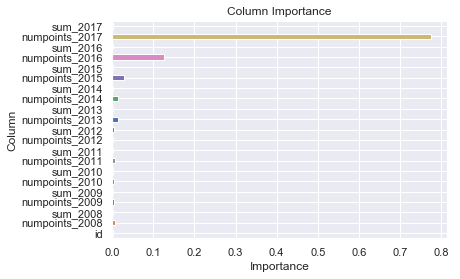

In [17]:
feat_importances = pd.Series(regressor.best_estimator_.feature_importances_, index=london_grid_training1_x.columns)
feat_importances.plot(kind='barh')

feat_importances.plot(kind='barh')
plt.title('Column Importance')
plt.xlabel('Importance')
plt.ylabel('Column')
plt.savefig('test1.png')

In [18]:
# Now test 2008-2016 for 2017
london_grid_training2_x = london_grid_training_x.drop(['numpoints_2017', 'sum_2017','numpoints_2018', 'sum_2018'], axis=1)
london_grid_testing2_x = london_grid_testing_x.drop(['numpoints_2017', 'sum_2017','numpoints_2018', 'sum_2018'], axis=1)
london_grid_training2_y = london_grid_training_y[['numpoints_2017']]
london_grid_testing2_y = london_grid_testing_y[['numpoints_2017']]
print(len(london_grid_training2_x))
print(len(london_grid_testing2_x))
print(len(london_grid_training2_y))
print(len(london_grid_testing2_y))


4999
1667
4999
1667


In [19]:
regressor.fit(london_grid_training2_x, london_grid_training2_y.values.ravel())

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=1234, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [200, 300, 400, 500, 600, 700], 'max_features': ['sqrt', 'auto']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [20]:
# Print out the scores of the different parameters
print("The best parameters identified are: " + str(regressor.best_params_))
result = pd.DataFrame(regressor.cv_results_)
result[['mean_test_score', 'std_test_score', 'params']]


The best parameters identified are: {'max_features': 'auto', 'n_estimators': 200}


,mean_test_score,std_test_score,params
0,-173.011,342.116,"{'max_features': 'sqrt', 'n_estimators': 200}"
1,-175.686,347.399,"{'max_features': 'sqrt', 'n_estimators': 300}"
2,-175.203,346.568,"{'max_features': 'sqrt', 'n_estimators': 400}"
3,-175.829,347.807,"{'max_features': 'sqrt', 'n_estimators': 500}"
4,-176.211,348.705,"{'max_features': 'sqrt', 'n_estimators': 600}"
5,-176.372,349.033,"{'max_features': 'sqrt', 'n_estimators': 700}"
6,-166.002,329.306,"{'max_features': 'auto', 'n_estimators': 200}"
7,-168.632,334.537,"{'max_features': 'auto', 'n_estimators': 300}"
8,-168.072,333.435,"{'max_features': 'auto', 'n_estimators': 400}"
9,-168.465,334.241,"{'max_features': 'auto', 'n_estimators': 500}"


In [21]:
result.to_csv('results_predict_2017.csv')
y_pred2 = regressor.predict(london_grid_testing2_x)

In [22]:
regressor.score(london_grid_testing2_x, london_grid_testing2_y)

-0.08840551889622077

In [25]:
print('Mean Absolute Error:', metrics.mean_absolute_error(london_grid_testing2_y, y_pred2))  
print('Mean Squared Error:', metrics.mean_squared_error(london_grid_testing2_y, y_pred2))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(london_grid_testing2_y, y_pred2))) 
print('R Squared:', metrics.r2_score(london_grid_testing2_y, y_pred2))

Mean Absolute Error: 0.06938812237552489
Mean Squared Error: 0.08840551889622077
Root Mean Squared Error: 0.2973306558298703
R Squared: 0.9904840422082865


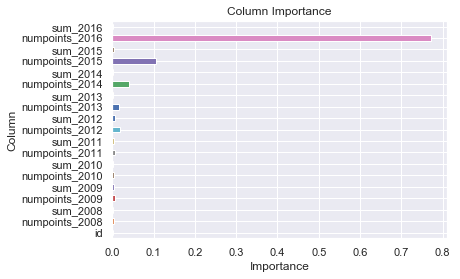

In [24]:
feat_importances = pd.Series(regressor.best_estimator_.feature_importances_, index=london_grid_training2_x.columns)
feat_importances.plot(kind='barh')

feat_importances.plot(kind='barh')
plt.title('Column Importance')
plt.xlabel('Importance')
plt.ylabel('Column')
plt.savefig('test2.png')

In [26]:
#2008-2013 for 2014
london_grid_training3_x = london_grid_training_x.drop(['numpoints_2014', 'sum_2014', 'numpoints_2015', 'sum_2015', 'numpoints_2016', 'sum_2016', 'numpoints_2017', 'sum_2017','numpoints_2018', 'sum_2018'], axis=1)
london_grid_testing3_x = london_grid_testing_x.drop(['numpoints_2014', 'sum_2014', 'numpoints_2015', 'sum_2015', 'numpoints_2016', 'sum_2016', 'numpoints_2017', 'sum_2017','numpoints_2018', 'sum_2018'], axis=1)
london_grid_training3_y = london_grid_training_y[['numpoints_2014']]
london_grid_testing3_y = london_grid_testing_y[['numpoints_2014']]
print(len(london_grid_training3_x))
print(len(london_grid_testing3_x))
print(len(london_grid_training3_y))
print(len(london_grid_testing3_y))
london_grid_testing3_x.head()

4999
1667
4999
1667


,id,numpoints_2008,sum_2008,numpoints_2009,sum_2009,numpoints_2010,sum_2010,numpoints_2011,sum_2011,numpoints_2012,sum_2012,numpoints_2013,sum_2013
0,50,0,0,0,0,0,0,0,0,0,0,0,0
1,51,0,0,0,0,0,0,0,0,0,0,0,0
2,52,0,0,0,0,0,0,0,0,0,0,0,0
3,53,0,0,0,0,0,0,0,0,0,0,0,0
4,54,0,0,0,0,0,0,0,0,0,0,0,0


In [27]:
regressor.fit(london_grid_training3_x, london_grid_training3_y.values.ravel())

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=1234, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [200, 300, 400, 500, 600, 700], 'max_features': ['sqrt', 'auto']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [28]:
# Print out the scores of the different parameters
print("The best parameters identified are: " + str(regressor.best_params_))
result = pd.DataFrame(regressor.cv_results_)
result[['mean_test_score', 'std_test_score', 'params']]

The best parameters identified are: {'max_features': 'auto', 'n_estimators': 200}


,mean_test_score,std_test_score,params
0,-62.574,123.503,"{'max_features': 'sqrt', 'n_estimators': 200}"
1,-64.076,126.522,"{'max_features': 'sqrt', 'n_estimators': 300}"
2,-62.877,124.138,"{'max_features': 'sqrt', 'n_estimators': 400}"
3,-63.074,124.547,"{'max_features': 'sqrt', 'n_estimators': 500}"
4,-63.513,125.433,"{'max_features': 'sqrt', 'n_estimators': 600}"
5,-63.765,125.930,"{'max_features': 'sqrt', 'n_estimators': 700}"
6,-58.749,116.021,"{'max_features': 'auto', 'n_estimators': 200}"
7,-59.578,117.679,"{'max_features': 'auto', 'n_estimators': 300}"
8,-59.160,116.853,"{'max_features': 'auto', 'n_estimators': 400}"
9,-59.501,117.528,"{'max_features': 'auto', 'n_estimators': 500}"


In [30]:
result.to_csv('results_predict_2014.csv')
y_pred3 = regressor.predict(london_grid_testing3_x)
regressor.score(london_grid_testing3_x, london_grid_testing3_y)

-0.02594884523095381

In [31]:
print('Mean Absolute Error:', metrics.mean_absolute_error(london_grid_testing3_y, y_pred3))  
print('Mean Squared Error:', metrics.mean_squared_error(london_grid_testing3_y, y_pred3))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(london_grid_testing3_y, y_pred3))) 
print('R Squared:', metrics.r2_score(london_grid_testing3_y, y_pred3))

Mean Absolute Error: 0.06356628674265147
Mean Squared Error: 0.02594884523095381
Root Mean Squared Error: 0.16108645266115276
R Squared: 0.9954614993157219


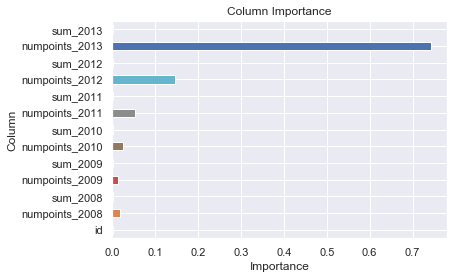

In [32]:
feat_importances = pd.Series(regressor.best_estimator_.feature_importances_, index=london_grid_training3_x.columns)
feat_importances.plot(kind='barh')

feat_importances.plot(kind='barh')
plt.title('Column Importance')
plt.xlabel('Importance')
plt.ylabel('Column')
plt.savefig('test3.png')

In [33]:
#2008-2013 for 2014
london_grid_training4_x = london_grid_training_x.drop(['numpoints_2011', 'sum_2011', 'numpoints_2012', 'sum_2012', 'numpoints_2013', 'sum_2013', 'numpoints_2014', 'sum_2014', 'numpoints_2015', 'sum_2015', 'numpoints_2016', 'sum_2016', 'numpoints_2017', 'sum_2017','numpoints_2018', 'sum_2018'], axis=1)
london_grid_testing4_x = london_grid_testing_x.drop(['numpoints_2011', 'sum_2011', 'numpoints_2012', 'sum_2012', 'numpoints_2013', 'sum_2013', 'numpoints_2014', 'sum_2014', 'numpoints_2015', 'sum_2015', 'numpoints_2016', 'sum_2016', 'numpoints_2017', 'sum_2017','numpoints_2018', 'sum_2018'], axis=1)
london_grid_training4_y = london_grid_training_y[['numpoints_2011']]
london_grid_testing4_y = london_grid_testing_y[['numpoints_2011']]
print(len(london_grid_training4_x))
print(len(london_grid_testing4_x))
print(len(london_grid_training4_y))
print(len(london_grid_testing4_y))
london_grid_testing4_x.head()

4999
1667
4999
1667


,id,numpoints_2008,sum_2008,numpoints_2009,sum_2009,numpoints_2010,sum_2010
0,50,0,0,0,0,0,0
1,51,0,0,0,0,0,0
2,52,0,0,0,0,0,0
3,53,0,0,0,0,0,0
4,54,0,0,0,0,0,0


In [34]:
regressor.fit(london_grid_training4_x, london_grid_training4_y.values.ravel())

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=1234, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [200, 300, 400, 500, 600, 700], 'max_features': ['sqrt', 'auto']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [35]:
# Print out the scores of the different parameters
print("The best parameters identified are: " + str(regressor.best_params_))
result = pd.DataFrame(regressor.cv_results_)
result[['mean_test_score', 'std_test_score', 'params']]

The best parameters identified are: {'max_features': 'auto', 'n_estimators': 400}


,mean_test_score,std_test_score,params
0,-24.426,47.683,"{'max_features': 'sqrt', 'n_estimators': 200}"
1,-24.870,48.607,"{'max_features': 'sqrt', 'n_estimators': 300}"
2,-25.147,49.159,"{'max_features': 'sqrt', 'n_estimators': 400}"
3,-25.481,49.815,"{'max_features': 'sqrt', 'n_estimators': 500}"
4,-25.608,50.067,"{'max_features': 'sqrt', 'n_estimators': 600}"
5,-25.514,49.883,"{'max_features': 'sqrt', 'n_estimators': 700}"
6,-22.408,43.599,"{'max_features': 'auto', 'n_estimators': 200}"
7,-22.834,44.464,"{'max_features': 'auto', 'n_estimators': 300}"
8,-22.300,43.391,"{'max_features': 'auto', 'n_estimators': 400}"
9,-22.697,44.188,"{'max_features': 'auto', 'n_estimators': 500}"


In [36]:
result.to_csv('results_predict_2011.csv')
y_pred4 = regressor.predict(london_grid_testing4_x)
regressor.score(london_grid_testing4_x, london_grid_testing4_y)

-0.028528869226154774

In [37]:
print('Mean Absolute Error:', metrics.mean_absolute_error(london_grid_testing4_y, y_pred4))  
print('Mean Squared Error:', metrics.mean_squared_error(london_grid_testing4_y, y_pred3))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(london_grid_testing4_y, y_pred4))) 
print('R Squared:', metrics.r2_score(london_grid_testing4_y, y_pred4))

Mean Absolute Error: 0.04553089382123575
Mean Squared Error: 1.1516896970605879
Root Mean Squared Error: 0.16890491178812644
R Squared: 0.9905255181212316


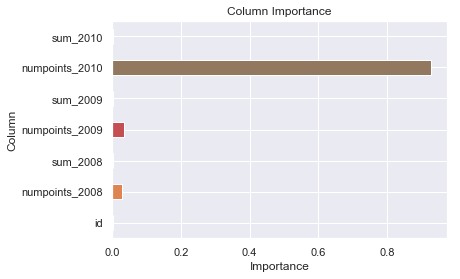

In [38]:
feat_importances = pd.Series(regressor.best_estimator_.feature_importances_, index=london_grid_training4_x.columns)
feat_importances.plot(kind='barh')

feat_importances.plot(kind='barh')
plt.title('Column Importance')
plt.xlabel('Importance')
plt.ylabel('Column')
plt.savefig('test4.png')

In [52]:
# Take the first half of the data for training and testing
london_grid_nozero = london_grid
london_grid_nozero = london_grid[london_grid.numpoints_2018 != 0]
print(len(london_grid_nozero))
london_grid_nozero_training_x = london_grid_nozero.iloc[0:2720,:]
london_grid_nozero_training_y = london_grid_nozero.iloc[0:2720,:]
london_grid_nozero_testing_x = london_grid_nozero.iloc[0:906,:]
london_grid_nozero_testing_y = london_grid_nozero.iloc[0:906,:]
london_grid_nozero_training_x = london_grid_nozero_training_x.drop(['numpoints_2018', 'sum_2018'], axis=1)
london_grid_nozero_testing_x = london_grid_nozero_testing_x.drop(['numpoints_2018', 'sum_2018'], axis=1)
london_grid_nozero_training_y = london_grid_nozero_training_y[['numpoints_2018']]
london_grid_nozero_testing_y = london_grid_nozero_testing_y[['numpoints_2018']]
print(len(london_grid_nozero_training_x))
print(len(london_grid_nozero_testing_x))
print(len(london_grid_nozero_training_y))
print(len(london_grid_nozero_testing_y))
london_grid_nozero_testing_x.head()

3040
2720
906
2720
906


,id,numpoints_2008,sum_2008,numpoints_2009,sum_2009,numpoints_2010,sum_2010,numpoints_2011,sum_2011,numpoints_2012,...,numpoints_2013,sum_2013,numpoints_2014,sum_2014,numpoints_2015,sum_2015,numpoints_2016,sum_2016,numpoints_2017,sum_2017
47,296,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,1,0
72,415,1,3,1,3,1,4,1,4,1,...,1,4,1,5,1,6,1,9,2,9
73,416,1,2,1,2,1,3,1,3,1,...,1,3,1,4,1,5,1,7,1,8
82,517,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,1,0
96,531,1,3,1,3,1,4,1,4,1,...,1,6,1,7,1,8,2,8,2,9


In [53]:
regressor.fit(london_grid_nozero_training_x, london_grid_nozero_training_y.values.ravel())

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=1234, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [200, 300, 400, 500, 600, 700], 'max_features': ['sqrt', 'auto']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [54]:
# Print out the scores of the different parameters
print("The best parameters identified are: " + str(regressor.best_params_))
result = pd.DataFrame(regressor.cv_results_)
result[['mean_test_score', 'std_test_score', 'params']]

The best parameters identified are: {'max_features': 'auto', 'n_estimators': 600}


,mean_test_score,std_test_score,params
0,-153.434,274.036,"{'max_features': 'sqrt', 'n_estimators': 200}"
1,-155.892,276.494,"{'max_features': 'sqrt', 'n_estimators': 300}"
2,-156.367,275.773,"{'max_features': 'sqrt', 'n_estimators': 400}"
3,-157.445,276.201,"{'max_features': 'sqrt', 'n_estimators': 500}"
4,-157.555,275.900,"{'max_features': 'sqrt', 'n_estimators': 600}"
5,-157.584,277.455,"{'max_features': 'sqrt', 'n_estimators': 700}"
6,-137.731,262.706,"{'max_features': 'auto', 'n_estimators': 200}"
7,-137.371,262.833,"{'max_features': 'auto', 'n_estimators': 300}"
8,-135.146,258.142,"{'max_features': 'auto', 'n_estimators': 400}"
9,-134.167,256.207,"{'max_features': 'auto', 'n_estimators': 500}"


In [59]:
result.to_csv('results_predict_2018_nozeros.csv')
y_prednozero = regressor.predict(london_grid_nozero_testing_x)
regressor.score(london_grid_nozero_testing_x, london_grid_nozero_testing_y)

-0.4609532131469215

In [56]:
print('Mean Absolute Error:', metrics.mean_absolute_error(london_grid_nozero_testing_y, y_prednozero))  
print('Mean Squared Error:', metrics.mean_squared_error(london_grid_nozero_testing_y, y_prednozero))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(london_grid_nozero_testing_y, y_prednozero))) 
print('R Squared:', metrics.r2_score(london_grid_nozero_testing_y, y_prednozero))

Mean Absolute Error: 0.16956217807211185
Mean Squared Error: 0.4609532131469215
Root Mean Squared Error: 0.6789353527007719
R Squared: 0.9837086255814086


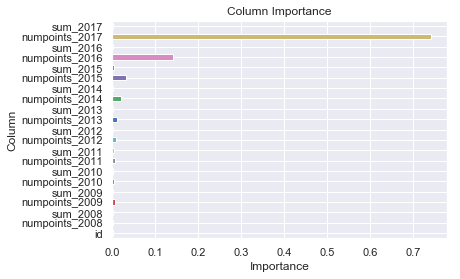

In [57]:
feat_importances = pd.Series(regressor.best_estimator_.feature_importances_, index=london_grid_nozero_training_x.columns)
feat_importances.plot(kind='barh')

feat_importances.plot(kind='barh')
plt.title('Column Importance')
plt.xlabel('Importance')
plt.ylabel('Column')
plt.savefig('test5.png')

In [14]:
london_grid_predict = london_grid
london_grid_predict = pd.merge(london_grid_predict, london_gridtrim_2019, how='right', on='id')
london_grid_predict['numpoints_2019'] = london_grid_predict['numpoints_2019'].multiply(2)
# london_grid_predict["numpoints_2020"] = 0
# london_grid_predict["numpoints_2021"] = 0
# london_grid_predict["numpoints_2022"] = 0
# london_grid_predict["numpoints_2023"] = 0
# london_grid_predict["numpoints_2024"] = 0
# london_grid_predict["numpoints_2025"] = 0
london_grid_predict.head()
# london_grid_predict.to_csv('london_grid_predict.csv')
# regressor.fit(london_grid)
# prediction_2020 = regressor.predict(london_grid)

,id,numpoints_2008,sum_2008,numpoints_2009,sum_2009,numpoints_2010,sum_2010,numpoints_2011,sum_2011,numpoints_2012,...,numpoints_2015,sum_2015,numpoints_2016,sum_2016,numpoints_2017,sum_2017,numpoints_2018,sum_2018,numpoints_2019,sum_2019
0,50,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,51,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,52,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,53,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,54,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
#Predicting 2020
london_grid_predict_2020x = london_grid_predict.drop(['numpoints_2019'], axis=1)
london_grid_predict_2020y = london_grid_predict[['numpoints_2019']]
print(len(london_grid_predict_2020x))
print(len(london_grid_predict_2020y))
london_grid_predict_2020x.head()

6666
6666


,id,numpoints_2008,sum_2008,numpoints_2009,sum_2009,numpoints_2010,sum_2010,numpoints_2011,sum_2011,numpoints_2012,...,sum_2014,numpoints_2015,sum_2015,numpoints_2016,sum_2016,numpoints_2017,sum_2017,numpoints_2018,sum_2018,sum_2019
0,50,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,51,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,52,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,53,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,54,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
regressor.fit(london_grid_predict_2020x, london_grid_predict_2020y.values.ravel())

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=1234, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [200, 300, 400, 500, 600, 700], 'max_features': ['sqrt', 'auto']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [18]:
# Print out the scores of the different parameters
print("The best parameters identified are: " + str(regressor.best_params_))
result = pd.DataFrame(regressor.cv_results_)
result[['mean_test_score', 'std_test_score', 'params']]

The best parameters identified are: {'max_features': 'auto', 'n_estimators': 200}


,mean_test_score,std_test_score,params
0,-825.774,"1,647.757","{'max_features': 'sqrt', 'n_estimators': 200}"
1,-830.744,"1,657.744","{'max_features': 'sqrt', 'n_estimators': 300}"
2,-831.859,"1,659.850","{'max_features': 'sqrt', 'n_estimators': 400}"
3,-832.532,"1,660.875","{'max_features': 'sqrt', 'n_estimators': 500}"
4,-832.574,"1,660.960","{'max_features': 'sqrt', 'n_estimators': 600}"
5,-831.347,"1,658.606","{'max_features': 'sqrt', 'n_estimators': 700}"
6,-804.942,"1,609.539","{'max_features': 'auto', 'n_estimators': 200}"
7,-812.569,"1,624.797","{'max_features': 'auto', 'n_estimators': 300}"
8,-812.214,"1,624.085","{'max_features': 'auto', 'n_estimators': 400}"
9,-812.773,"1,625.204","{'max_features': 'auto', 'n_estimators': 500}"


In [48]:
result.to_csv('results_predict_2020.csv')
predict_2020 = regressor.predict(london_grid_predict_2020x)
regressor.score(london_grid_predict_2020x, london_grid_predict_2020y)

-16.019814431443155

In [49]:
print('Mean Absolute Error:', metrics.mean_absolute_error(london_grid_predict_2020y, predict_2020))  
print('Mean Squared Error:', metrics.mean_squared_error(london_grid_predict_2020y, predict_2020))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(london_grid_predict_2020y, predict_2020))) 
print('R Squared:', metrics.r2_score(london_grid_predict_2020y, predict_2020))

Mean Absolute Error: 0.1517101710171017
Mean Squared Error: 16.019814431443155
Root Mean Squared Error: 4.002476037585129
R Squared: 0.9910275909381268


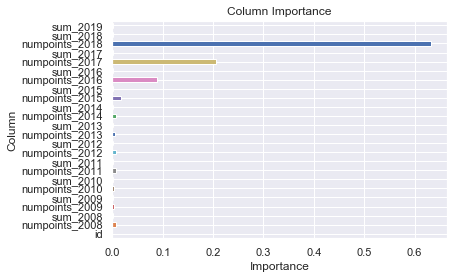

In [50]:
feat_importances = pd.Series(regressor.best_estimator_.feature_importances_, index=london_grid_predict_2020x.columns)
feat_importances.plot(kind='barh')

feat_importances.plot(kind='barh')
plt.title('Column Importance')
plt.xlabel('Importance')
plt.ylabel('Column')
plt.savefig('test6.png')

In [56]:
predict_2020 = pd.DataFrame(predict_2020)
predict_2020 = predict_2020.rename(columns={predict_2020.columns[0]: "numpoints_2020" })
london_grid_predict_w_2020 = pd.merge(london_grid_predict, predict_2020, left_index=True,right_index=True)
london_grid_predict_w_2020.head()
london_grid_predict_w_2020.to_csv('london_grid_predict_w_2020.csv')

In [7]:
london_grid_predict = pd.read_csv('london_grid_predict_w_2020.csv')
london_grid_predict = london_grid_predict.drop(['Unnamed: 0'], axis=1)
london_grid_predict.head()

,id,numpoints_2008,sum_2008,numpoints_2009,sum_2009,numpoints_2010,sum_2010,numpoints_2011,sum_2011,numpoints_2012,...,sum_2015,numpoints_2016,sum_2016,numpoints_2017,sum_2017,numpoints_2018,sum_2018,numpoints_2019,sum_2019,numpoints_2020
0,50,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000
1,51,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000
2,52,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000
3,53,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000
4,54,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000


In [8]:
#Predicting 2021
london_grid_predict_2021x = london_grid_predict.drop(['numpoints_2020'], axis=1)
london_grid_predict_2021y = london_grid_predict[['numpoints_2020']]
print(len(london_grid_predict_2021x))
print(len(london_grid_predict_2021y))
london_grid_predict_2021x.head()

6666
6666


,id,numpoints_2008,sum_2008,numpoints_2009,sum_2009,numpoints_2010,sum_2010,numpoints_2011,sum_2011,numpoints_2012,...,numpoints_2015,sum_2015,numpoints_2016,sum_2016,numpoints_2017,sum_2017,numpoints_2018,sum_2018,numpoints_2019,sum_2019
0,50,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,51,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,52,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,53,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,54,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
regressor.fit(london_grid_predict_2021x, london_grid_predict_2021y.values.ravel())

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=1234, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [200, 300, 400, 500, 600, 700], 'max_features': ['sqrt', 'auto']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [10]:
# Print out the scores of the different parameters
print("The best parameters identified are: " + str(regressor.best_params_))
result = pd.DataFrame(regressor.cv_results_)
result[['mean_test_score', 'std_test_score', 'params']]

The best parameters identified are: {'max_features': 'auto', 'n_estimators': 200}


,mean_test_score,std_test_score,params
0,-683.452,"1,365.978","{'max_features': 'sqrt', 'n_estimators': 200}"
1,-689.094,"1,377.206","{'max_features': 'sqrt', 'n_estimators': 300}"
2,-689.269,"1,377.574","{'max_features': 'sqrt', 'n_estimators': 400}"
3,-691.240,"1,381.495","{'max_features': 'sqrt', 'n_estimators': 500}"
4,-691.825,"1,382.688","{'max_features': 'sqrt', 'n_estimators': 600}"
5,-690.550,"1,380.132","{'max_features': 'sqrt', 'n_estimators': 700}"
6,-681.924,"1,363.956","{'max_features': 'auto', 'n_estimators': 200}"
7,-688.117,"1,376.342","{'max_features': 'auto', 'n_estimators': 300}"
8,-685.212,"1,370.533","{'max_features': 'auto', 'n_estimators': 400}"
9,-685.561,"1,371.230","{'max_features': 'auto', 'n_estimators': 500}"


In [11]:
result.to_csv('results_predict_2021.csv')
predict_2021 = regressor.predict(london_grid_predict_2021x)
regressor.score(london_grid_predict_2021x, london_grid_predict_2021y)

-6.6707364885536045

In [12]:
print('Mean Absolute Error:', metrics.mean_absolute_error(london_grid_predict_2021y, predict_2021))  
print('Mean Squared Error:', metrics.mean_squared_error(london_grid_predict_2021y, predict_2021))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(london_grid_predict_2021y, predict_2021))) 
print('R Squared:', metrics.r2_score(london_grid_predict_2021y, predict_2021))

Mean Absolute Error: 0.07511298379838033
Mean Squared Error: 6.6707364885536045
Root Mean Squared Error: 2.582776894846631
R Squared: 0.9959491185191323


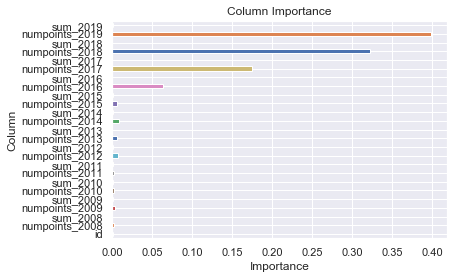

In [13]:
feat_importances = pd.Series(regressor.best_estimator_.feature_importances_, index=london_grid_predict_2021x.columns)
feat_importances.plot(kind='barh')

feat_importances.plot(kind='barh')
plt.title('Column Importance')
plt.xlabel('Importance')
plt.ylabel('Column')
plt.savefig('test7.png')

In [5]:
# predict_2021 = pd.DataFrame(predict_2021)
# predict_2021 = predict_2021.rename(columns={predict_2021.columns[0]: "numpoints_2021" })
# london_grid_predict_w_2021 = pd.merge(london_grid_predict, predict_2021, left_index=True,right_index=True)
# london_grid_predict_w_2021.head()
# london_grid_predict_w_2021.to_csv('london_grid_predict_w_2021.csv')
london_grid_predict = pd.read_csv('london_grid_predict_w_2021.csv')
london_grid_predict = london_grid_predict.drop(['Unnamed: 0'], axis=1)
london_grid_predict.head()

,id,numpoints_2008,sum_2008,numpoints_2009,sum_2009,numpoints_2010,sum_2010,numpoints_2011,sum_2011,numpoints_2012,...,numpoints_2016,sum_2016,numpoints_2017,sum_2017,numpoints_2018,sum_2018,numpoints_2019,sum_2019,numpoints_2020,numpoints_2021
0,50,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.000,0.000
1,51,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.000,0.000
2,52,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.000,0.000
3,53,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.000,0.000
4,54,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.000,0.000


In [6]:
#Predicting 2022
london_grid_predict_2022x = london_grid_predict.drop(['numpoints_2021'], axis=1)
london_grid_predict_2022y = london_grid_predict[['numpoints_2021']]
print(len(london_grid_predict_2022x))
print(len(london_grid_predict_2022y))
london_grid_predict_2022x.head()

6666
6666


,id,numpoints_2008,sum_2008,numpoints_2009,sum_2009,numpoints_2010,sum_2010,numpoints_2011,sum_2011,numpoints_2012,...,sum_2015,numpoints_2016,sum_2016,numpoints_2017,sum_2017,numpoints_2018,sum_2018,numpoints_2019,sum_2019,numpoints_2020
0,50,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000
1,51,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000
2,52,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000
3,53,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000
4,54,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000


In [7]:
regressor.fit(london_grid_predict_2022x, london_grid_predict_2022y.values.ravel())

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=1234, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [200, 300, 400, 500, 600, 700], 'max_features': ['sqrt', 'auto']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [8]:
# Print out the scores of the different parameters
print("The best parameters identified are: " + str(regressor.best_params_))
result = pd.DataFrame(regressor.cv_results_)
result[['mean_test_score', 'std_test_score', 'params']]

The best parameters identified are: {'max_features': 'auto', 'n_estimators': 200}


,mean_test_score,std_test_score,params
0,-621.049,"1,241.711","{'max_features': 'sqrt', 'n_estimators': 200}"
1,-622.939,"1,245.529","{'max_features': 'sqrt', 'n_estimators': 300}"
2,-624.111,"1,247.873","{'max_features': 'sqrt', 'n_estimators': 400}"
3,-624.547,"1,248.739","{'max_features': 'sqrt', 'n_estimators': 500}"
4,-624.720,"1,249.093","{'max_features': 'sqrt', 'n_estimators': 600}"
5,-622.775,"1,245.209","{'max_features': 'sqrt', 'n_estimators': 700}"
6,-609.062,"1,218.234","{'max_features': 'auto', 'n_estimators': 200}"
7,-612.883,"1,225.877","{'max_features': 'auto', 'n_estimators': 300}"
8,-613.982,"1,228.074","{'max_features': 'auto', 'n_estimators': 400}"
9,-614.922,"1,229.955","{'max_features': 'auto', 'n_estimators': 500}"


In [9]:
result.to_csv('results_predict_2022.csv')
predict_2022 = regressor.predict(london_grid_predict_2022x)
regressor.score(london_grid_predict_2022x, london_grid_predict_2022y)

-3.363855395899971

In [10]:
print('Mean Absolute Error:', metrics.mean_absolute_error(london_grid_predict_2022y, predict_2022))  
print('Mean Squared Error:', metrics.mean_squared_error(london_grid_predict_2022y, predict_2022))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(london_grid_predict_2022y, predict_2022))) 
print('R Squared:', metrics.r2_score(london_grid_predict_2022y, predict_2022))

Mean Absolute Error: 0.04619018644649047
Mean Squared Error: 3.363855395899971
Root Mean Squared Error: 1.834081621929616
R Squared: 0.9978560623139477


In [26]:
feat_importances = pd.Series(regressor.best_estimator_.feature_importances_, index=london_grid_predict_2022x.columns)
feat_importances.plot(kind='barh')

feat_importances.plot(kind='barh')
plt.title('Column Importance')
plt.xlabel('Importance')
plt.ylabel('Column')
plt.savefig('test8.png')

ValueError: Length of passed values is 27, index implies 26

In [22]:
# predict_2022 = pd.DataFrame(predict_2022)
# predict_2022 = predict_2022.rename(columns={predict_2022.columns[0]: "numpoints_2022" })
# london_grid_predict_w_2022 = pd.merge(london_grid_predict, predict_2022, left_index=True,right_index=True)
# london_grid_predict_w_2022.head()
# london_grid_predict_w_2022.to_csv('london_grid_predict_w_2022.csv')
london_grid_predict = pd.read_csv('london_grid_predict_w_2022.csv')
london_grid_predict = london_grid_predict.drop(['Unnamed: 0'], axis=1)
london_grid_predict.head()

,id,numpoints_2008,sum_2008,numpoints_2009,sum_2009,numpoints_2010,sum_2010,numpoints_2011,sum_2011,numpoints_2012,...,sum_2016,numpoints_2017,sum_2017,numpoints_2018,sum_2018,numpoints_2019,sum_2019,numpoints_2020,numpoints_2021,numpoints_2022
0,50,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.000,0.000,0.000
1,51,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.000,0.000,0.000
2,52,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.000,0.000,0.000
3,53,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.000,0.000,0.000
4,54,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.000,0.000,0.000


In [23]:
#Predicting 2023
london_grid_predict_2023x = london_grid_predict.drop(['numpoints_2022'], axis=1)
london_grid_predict_2023y = london_grid_predict[['numpoints_2022']]
print(len(london_grid_predict_2023x))
print(len(london_grid_predict_2023y))
london_grid_predict_2023x.head()

6666
6666


,id,numpoints_2008,sum_2008,numpoints_2009,sum_2009,numpoints_2010,sum_2010,numpoints_2011,sum_2011,numpoints_2012,...,numpoints_2016,sum_2016,numpoints_2017,sum_2017,numpoints_2018,sum_2018,numpoints_2019,sum_2019,numpoints_2020,numpoints_2021
0,50,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.000,0.000
1,51,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.000,0.000
2,52,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.000,0.000
3,53,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.000,0.000
4,54,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.000,0.000


In [24]:
regressor.fit(london_grid_predict_2023x, london_grid_predict_2023y.values.ravel())

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=1234, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [200, 300, 400, 500, 600, 700], 'max_features': ['sqrt', 'auto']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [27]:
# Print out the scores of the different parameters
print("The best parameters identified are: " + str(regressor.best_params_))
result = pd.DataFrame(regressor.cv_results_)
result[['mean_test_score', 'std_test_score', 'params']]

The best parameters identified are: {'max_features': 'auto', 'n_estimators': 200}


,mean_test_score,std_test_score,params
0,-578.093,"1,156.027","{'max_features': 'sqrt', 'n_estimators': 200}"
1,-581.998,"1,163.861","{'max_features': 'sqrt', 'n_estimators': 300}"
2,-580.849,"1,161.586","{'max_features': 'sqrt', 'n_estimators': 400}"
3,-582.068,"1,164.038","{'max_features': 'sqrt', 'n_estimators': 500}"
4,-582.439,"1,164.792","{'max_features': 'sqrt', 'n_estimators': 600}"
5,-581.133,"1,162.181","{'max_features': 'sqrt', 'n_estimators': 700}"
6,-572.963,"1,146.031","{'max_features': 'auto', 'n_estimators': 200}"
7,-576.008,"1,152.121","{'max_features': 'auto', 'n_estimators': 300}"
8,-574.020,"1,148.144","{'max_features': 'auto', 'n_estimators': 400}"
9,-573.559,"1,147.223","{'max_features': 'auto', 'n_estimators': 500}"


In [28]:
result.to_csv('results_predict_2023.csv')
predict_2023 = regressor.predict(london_grid_predict_2023x)
regressor.score(london_grid_predict_2023x, london_grid_predict_2023y)

-1.5480117677854421

In [29]:
print('Mean Absolute Error:', metrics.mean_absolute_error(london_grid_predict_2023y, predict_2023))  
print('Mean Squared Error:', metrics.mean_squared_error(london_grid_predict_2023y, predict_2023))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(london_grid_predict_2023y, predict_2023))) 
print('R Squared:', metrics.r2_score(london_grid_predict_2023y, predict_2023))

Mean Absolute Error: 0.03349218125393984
Mean Squared Error: 1.5480117677854421
Root Mean Squared Error: 1.2441912102990609
R Squared: 0.9989823843918176


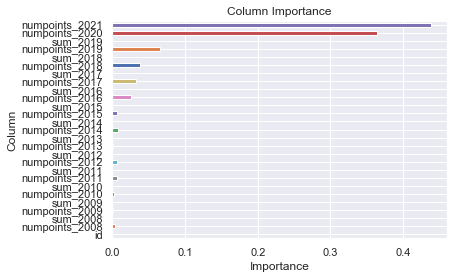

In [30]:
feat_importances = pd.Series(regressor.best_estimator_.feature_importances_, index=london_grid_predict_2023x.columns)
feat_importances.plot(kind='barh')

feat_importances.plot(kind='barh')
plt.title('Column Importance')
plt.xlabel('Importance')
plt.ylabel('Column')
plt.savefig('test9.png')

In [31]:
predict_2023 = pd.DataFrame(predict_2023)
predict_2023 = predict_2023.rename(columns={predict_2023.columns[0]: "numpoints_2023" })
london_grid_predict_w_2023 = pd.merge(london_grid_predict, predict_2023, left_index=True,right_index=True)
london_grid_predict_w_2023.head()
london_grid_predict_w_2023.to_csv('london_grid_predict_w_2023.csv')

In [4]:
london_grid_predict = pd.read_csv('london_grid_predict_w_2023.csv')
london_grid_predict = london_grid_predict.drop(['Unnamed: 0'], axis=1)
london_grid_predict.head()

,id,numpoints_2008,sum_2008,numpoints_2009,sum_2009,numpoints_2010,sum_2010,numpoints_2011,sum_2011,numpoints_2012,...,numpoints_2017,sum_2017,numpoints_2018,sum_2018,numpoints_2019,sum_2019,numpoints_2020,numpoints_2021,numpoints_2022,numpoints_2023
0,50,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.000,0.000,0.000,0.000
1,51,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.000,0.000,0.000,0.000
2,52,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.000,0.000,0.000,0.000
3,53,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.000,0.000,0.000,0.000
4,54,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.000,0.000,0.000,0.000


In [5]:
#Predicting 2024
london_grid_predict_2024x = london_grid_predict.drop(['numpoints_2023'], axis=1)
london_grid_predict_2024y = london_grid_predict[['numpoints_2023']]
print(len(london_grid_predict_2024x))
print(len(london_grid_predict_2024y))
london_grid_predict_2024x.head()

6666
6666


,id,numpoints_2008,sum_2008,numpoints_2009,sum_2009,numpoints_2010,sum_2010,numpoints_2011,sum_2011,numpoints_2012,...,sum_2016,numpoints_2017,sum_2017,numpoints_2018,sum_2018,numpoints_2019,sum_2019,numpoints_2020,numpoints_2021,numpoints_2022
0,50,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.000,0.000,0.000
1,51,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.000,0.000,0.000
2,52,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.000,0.000,0.000
3,53,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.000,0.000,0.000
4,54,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.000,0.000,0.000


In [6]:
regressor.fit(london_grid_predict_2024x, london_grid_predict_2024y.values.ravel())

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=1234, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [200, 300, 400, 500, 600, 700], 'max_features': ['sqrt', 'auto']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [7]:
# Print out the scores of the different parameters
print("The best parameters identified are: " + str(regressor.best_params_))
result = pd.DataFrame(regressor.cv_results_)
result[['mean_test_score', 'std_test_score', 'params']]

The best parameters identified are: {'max_features': 'auto', 'n_estimators': 200}


,mean_test_score,std_test_score,params
0,-547.672,"1,095.312","{'max_features': 'sqrt', 'n_estimators': 200}"
1,-551.740,"1,103.466","{'max_features': 'sqrt', 'n_estimators': 300}"
2,-551.199,"1,102.394","{'max_features': 'sqrt', 'n_estimators': 400}"
3,-551.572,"1,103.135","{'max_features': 'sqrt', 'n_estimators': 500}"
4,-551.813,"1,103.620","{'max_features': 'sqrt', 'n_estimators': 600}"
5,-550.698,"1,101.396","{'max_features': 'sqrt', 'n_estimators': 700}"
6,-540.587,"1,081.273","{'max_features': 'auto', 'n_estimators': 200}"
7,-545.905,"1,091.910","{'max_features': 'auto', 'n_estimators': 300}"
8,-545.436,"1,090.971","{'max_features': 'auto', 'n_estimators': 400}"
9,-546.225,"1,092.550","{'max_features': 'auto', 'n_estimators': 500}"


In [8]:
result.to_csv('results_predict_2024.csv')
predict_2024 = regressor.predict(london_grid_predict_2024x)
regressor.score(london_grid_predict_2024x, london_grid_predict_2024y)

-0.8605547745352938

In [9]:
print('Mean Absolute Error:', metrics.mean_absolute_error(london_grid_predict_2024y, predict_2024))  
print('Mean Squared Error:', metrics.mean_squared_error(london_grid_predict_2024y, predict_2024))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(london_grid_predict_2024y, predict_2024))) 
print('R Squared:', metrics.r2_score(london_grid_predict_2024y, predict_2024))

Mean Absolute Error: 0.03296505511958488
Mean Squared Error: 0.8605547745352938
Root Mean Squared Error: 0.9276609157096648
R Squared: 0.9994218285750708


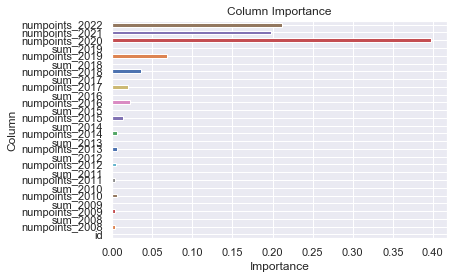

In [11]:
feat_importances = pd.Series(regressor.best_estimator_.feature_importances_, index=london_grid_predict_2024x.columns)
feat_importances.plot(kind='barh')

feat_importances.plot(kind='barh')
plt.title('Column Importance')
plt.xlabel('Importance')
plt.ylabel('Column')
plt.savefig('test10.png')

In [13]:
# predict_2024 = pd.DataFrame(predict_2024)
# predict_2024 = predict_2024.rename(columns={predict_2024.columns[0]: "numpoints_2024" })
# london_grid_predict_w_2024 = pd.merge(london_grid_predict, predict_2024, left_index=True,right_index=True)
# london_grid_predict_w_2024.head()
# london_grid_predict_w_2024.to_csv('london_grid_predict_w_2024.csv')
london_grid_predict = pd.read_csv('london_grid_predict_w_2024.csv')
london_grid_predict = london_grid_predict.drop(['Unnamed: 0'], axis=1)
london_grid_predict.head()

,id,numpoints_2008,sum_2008,numpoints_2009,sum_2009,numpoints_2010,sum_2010,numpoints_2011,sum_2011,numpoints_2012,...,sum_2017,numpoints_2018,sum_2018,numpoints_2019,sum_2019,numpoints_2020,numpoints_2021,numpoints_2022,numpoints_2023,numpoints_2024
0,50,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0.000,0.000,0.000,0.000,0.000
1,51,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0.000,0.000,0.000,0.000,0.000
2,52,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0.000,0.000,0.000,0.000,0.000
3,53,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0.000,0.000,0.000,0.000,0.000
4,54,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0.000,0.000,0.000,0.000,0.000


In [14]:
#Predicting 2025
london_grid_predict_2025x = london_grid_predict.drop(['numpoints_2024'], axis=1)
london_grid_predict_2025y = london_grid_predict[['numpoints_2024']]
print(len(london_grid_predict_2025x))
print(len(london_grid_predict_2025y))
london_grid_predict_2025x.head()

6666
6666


,id,numpoints_2008,sum_2008,numpoints_2009,sum_2009,numpoints_2010,sum_2010,numpoints_2011,sum_2011,numpoints_2012,...,numpoints_2017,sum_2017,numpoints_2018,sum_2018,numpoints_2019,sum_2019,numpoints_2020,numpoints_2021,numpoints_2022,numpoints_2023
0,50,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.000,0.000,0.000,0.000
1,51,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.000,0.000,0.000,0.000
2,52,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.000,0.000,0.000,0.000
3,53,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.000,0.000,0.000,0.000
4,54,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.000,0.000,0.000,0.000


In [15]:
regressor.fit(london_grid_predict_2025x, london_grid_predict_2025y.values.ravel())

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=1234, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [200, 300, 400, 500, 600, 700], 'max_features': ['sqrt', 'auto']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [16]:
# Print out the scores of the different parameters
print("The best parameters identified are: " + str(regressor.best_params_))
result = pd.DataFrame(regressor.cv_results_)
result[['mean_test_score', 'std_test_score', 'params']]

The best parameters identified are: {'max_features': 'sqrt', 'n_estimators': 200}


,mean_test_score,std_test_score,params
0,-528.894,"1,057.838","{'max_features': 'sqrt', 'n_estimators': 200}"
1,-532.243,"1,064.543","{'max_features': 'sqrt', 'n_estimators': 300}"
2,-530.679,"1,061.411","{'max_features': 'sqrt', 'n_estimators': 400}"
3,-530.517,"1,061.082","{'max_features': 'sqrt', 'n_estimators': 500}"
4,-531.002,"1,062.050","{'max_features': 'sqrt', 'n_estimators': 600}"
5,-529.676,"1,059.397","{'max_features': 'sqrt', 'n_estimators': 700}"
6,-530.271,"1,060.638","{'max_features': 'auto', 'n_estimators': 200}"
7,-532.669,"1,065.434","{'max_features': 'auto', 'n_estimators': 300}"
8,-532.037,"1,064.171","{'max_features': 'auto', 'n_estimators': 400}"
9,-531.939,"1,063.976","{'max_features': 'auto', 'n_estimators': 500}"


In [17]:
result.to_csv('results_predict_2025.csv')
predict_2025 = regressor.predict(london_grid_predict_2025x)
regressor.score(london_grid_predict_2025x, london_grid_predict_2025y)

-0.32295620499024136

In [18]:
print('Mean Absolute Error:', metrics.mean_absolute_error(london_grid_predict_2025y, predict_2025))  
print('Mean Squared Error:', metrics.mean_squared_error(london_grid_predict_2025y, predict_2025))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(london_grid_predict_2025y, predict_2025))) 
print('R Squared:', metrics.r2_score(london_grid_predict_2025y, predict_2025))

Mean Absolute Error: 0.041702964084719275
Mean Squared Error: 0.32295620499024136
Root Mean Squared Error: 0.5682923587294143
R Squared: 0.9997794704805401


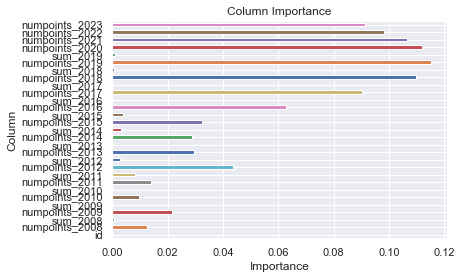

In [19]:
feat_importances = pd.Series(regressor.best_estimator_.feature_importances_, index=london_grid_predict_2025x.columns)
feat_importances.plot(kind='barh')

feat_importances.plot(kind='barh')
plt.title('Column Importance')
plt.xlabel('Importance')
plt.ylabel('Column')
plt.savefig('test11.png')

In [20]:
predict_2025 = pd.DataFrame(predict_2025)
predict_2025 = predict_2025.rename(columns={predict_2025.columns[0]: "numpoints_2025" })
london_grid_predict_w_2025 = pd.merge(london_grid_predict, predict_2025, left_index=True,right_index=True)
london_grid_predict_w_2025.head()
london_grid_predict_w_2025.to_csv('london_grid_predict_w_2025.csv')